# Hello World Agent

Our first LangGraph graph!

In [ ]:
%pip install langgraph IPython

In [ ]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph 
# framework that helps you design and manage the flow of tasks in your application using a graph

In [ ]:
# We now create an AgentState - shared data structure that keeps track of information as your application runs.

class AgentState(TypedDict):  # Our state schema
  message: str

def greeting_node(state: AgentState) -> AgentState:
  """Simple node that adds a greeting message to the state"""
  state['message'] = "Hey " + state['message'] + ", how is your day going?"
  return state

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)  # input: node and action
graph.set_entry_point("greeter")          # Set the entry point of the graph
graph.set_finish_point("greeter")         # Set the finish point of the graph

app = graph.compile()  # Compile the graph into an executable application

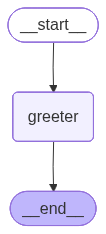

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))  # Visualize the graph structure

In [10]:
result = app.invoke({"message": "Ashik"})

In [11]:
result["message"]

'Hey Ashik, how is your day going?'

### Exercise for Graph 1

#### Your task

Create a **Personalized Compliment Agent** using LangGraph!

**Input**: {"name": "Bob"}
**Output**: "Bob, you're doing an amazing job learning LangGraph!"

*Hint*: You have to concatenate the state, not replace it.

In [13]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

class AgentState(TypedDict):  # Our state schema
  message: str

def compliment_node(state: AgentState) -> AgentState:
  """Simple node that adds a compliment to the state"""
  state['message'] = state['message'] + ", you're doing an amazing job learning LangGraph!"
  return state

In [14]:
graph = StateGraph(AgentState)

graph.add_node("Complement", compliment_node)  # Add our node to the graph
graph.set_entry_point("Complement")            # Set the entry point of the graph
graph.set_finish_point("Complement")           # Set the finish point of the graph

app = graph.compile()  # Compile the graph into an executable application

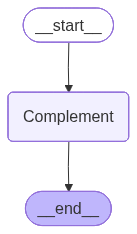

In [15]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))  # Visualize the graph structure

In [16]:
result = app.invoke({"message": "Bob"})  # Run the graph with initial state
result["message"]  # Check the updated message in the state

"Bob, you're doing an amazing job learning LangGraph!"